In [1]:
import os
import pandas as pd
import numpy as np 
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# 1. Base de données et choix des Variables.

In [2]:
df = pd.read_excel('C:/Users/wilfr/Downloads/streamer_20201104-121555.json.xlsx')

In [9]:
df['']

Index(['created_at', 'id', 'truncated', 'text-sentiment_global',
       'text-sentiment_compound', 'user-location', 'user-description',
       'user-protected', 'user-verified', 'user-followers_count',
       'user-friends_count', 'user-listed_count', 'user-favourites_count',
       'user-statuses_count', 'user-created_at', 'user-utc_offset',
       'user-time_zone', 'user-contributors_enabled', 'user-geo_enabled',
       'user-profile_background_color', 'user-profile_sidebar_border_color',
       'user-profile_sidebar_fill_color', 'user-profile_text_color',
       'user-profile_use_background_image', 'user-default_profile',
       'user-default_profile_image', 'user-following',
       'user-follow_request_sent', 'user-notifications', 'place-place_type',
       'place-name', 'place-full_name', 'place-country_code', 'place-country',
       'place-bounding_box', 'place-attributes',
       'user-description-sentiment_global'],
      dtype='object')

In [45]:
Xbrute = df[df.columns.difference(['text-sentiment_global'])] #Dataframe de Variables explicatives
Y = df['text-sentiment_global'] #Variable à expliquer
Xbrute
Y

0       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3       {'neg': 0.283, 'neu': 0.717, 'pos': 0.0, 'comp...
4       {'neg': 0.157, 'neu': 0.653, 'pos': 0.189, 'co...
                              ...                        
7706    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
7707    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
7708    {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'comp...
7709    {'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'comp...
7710    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: text-sentiment_global, Length: 7711, dtype: object

# 2. Méthodes de Sélections de Variables.

##  2.1 Sélection par les corrélations

### 2.1.1 Corrélations linéaires entre la variable à expliquer et les variables explicatives

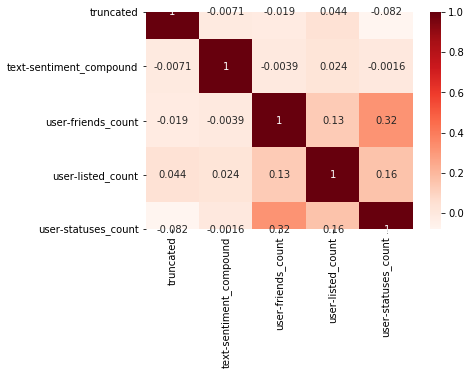

In [21]:
#Matrice de Corrélation

 
cor = df[['truncated','text-sentiment_compound','user-friends_count','user-listed_count','user-statuses_count']].corr() 
sns.heatmap (cor, annot = True, cmap = plt.cm.Reds) 
plt.show ()


In [27]:
#On va prendre les variables explicatives qui sont fortement corrélées,
#linéairement avec notre variable à expliquer. 0.1 est choisi arbitrairement

cor_target = abs (cor['user-friends_count'])
relevant_features = cor_target [cor_target> 0.1] 
LesCorrLin = relevant_features.index.tolist()  #Nous retirons les variables fortement corrélées linéairement pour essayer de voir
#celles qui sont aussi corrélées de manière non linéaire à notre y
basecol = df.columns.tolist()
for x in LesCorrLin :
    basecol.remove(x)
CorrNonLin = basecol
basecol

['created_at',
 'id',
 'truncated',
 'text-sentiment_global',
 'text-sentiment_compound',
 'user-location',
 'user-description',
 'user-protected',
 'user-verified',
 'user-followers_count',
 'user-favourites_count',
 'user-created_at',
 'user-utc_offset',
 'user-time_zone',
 'user-contributors_enabled',
 'user-geo_enabled',
 'user-profile_background_color',
 'user-profile_sidebar_border_color',
 'user-profile_sidebar_fill_color',
 'user-profile_text_color',
 'user-profile_use_background_image',
 'user-default_profile',
 'user-default_profile_image',
 'user-following',
 'user-follow_request_sent',
 'user-notifications',
 'place-place_type',
 'place-name',
 'place-full_name',
 'place-country_code',
 'place-country',
 'place-bounding_box',
 'place-attributes',
 'user-description-sentiment_global']

### 2.1.2 Corrélations non linéaires entre la variable à expliquer et les variables explicatives

In [34]:
# Corrélation de Kendall, Test de rang des variables. H0: les classements des variables sont indépendants H1: Ils sont corrélés
# Si la p-value est inférieure à 5% on rejette H0, donc on va choisir les variables qui ont une p-value supérieure à 0.05
ListNonLin=[]
for i in CorrNonLin:
    ListNonLin.append(scipy.stats.kendalltau(df["user-friends_count"],df[i]) )

[KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalue=nan),
 KendalltauResult(correlation=nan, pvalu

In [33]:
FilterCorr = LesCorrLin + ListNonLin
FilterCorr = FilterCorr.remove("user-friends_count")
#Nous avons l'ensemble des variables qui sont corrélés, selon 2 critères, avec notre variable explicative.

None


## 2.1.3 Corrélations linéaires entre les variables explicatives 

In [ ]:
#Etude des corrélations entre variables explicatives 
InterCorr =  FilterCorr[1:]
baseSec = base[InterCorr]
plt.figure (figsize = (20,13)) 
cor = baseSec.corr () 
sns.heatmap (cor, annot = True, cmap = plt.cm.Reds) 
plt.show ()

In [ ]:
corr_features = cor[abs (cor)> 0.6] 
corr_features = corr_features.where(~(corr_features==1))
corr_features

In [ ]:
#Obtention de la Base de données totales au niveau de la méthode de sélection des variables basée sur les corrélations
#On enlève les variables explicatives qui sont trop corrélées entre elles
AutoCorr = []
for x in AutoCorr:
    FilterCorr.remove(x)
FilterCorr
Xcorr = base[FilterCorr]

## 2.2 Utilisation de la Régression Lasso

In [46]:
#Utilisation de la régression Lasso 
X=Xbrute
reg = LassoCV()
reg.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

ValueError: could not convert string to float: "{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"

In [ ]:
imp_coef = coef.sort_values() 
import matplotlib 
matplotlib.rcParams ['figure.figsize'] = (8.0, 10.0) 
imp_coef.plot (kind = "barh") 
plt.title ("Importance des variables à l'aide du modèle Lasso")

In [ ]:
LossVar = imp_coef.index.where(imp_coef!=0)
LossVar = pd.DataFrame(LossVar)
LossVar = LossVar[~(LossVar==np.nan)].iloc[:,0].unique().tolist()

## 2.3 Utilisation de la méthode RFE

In [47]:
X= Xbrute
models = [("RF",RandomForestRegressor(random_state=0)),("GBR", GradientBoostingRegressor(random_state=0)),("DTR",DecisionTreeRegressor(random_state=0))]
#no of features 
nof_list = np.arange (1,19)             

#Meilleures variables 
           
NbVar = []
for nomodel, modele in models:
    nof = 0 
    high_score = 0 
    for n in range (len (nof_list)): 
        X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size = 0.2, random_state = 0) 
        model = modele
        rfe = RFE (model, nof_list [n]) 
        X_train_rfe = rfe.fit_transform (X_train, y_train) 
        X_test_rfe = rfe.transform(X_test)
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train_rfe, y_train, cv=10)
        score = cv_results.mean()
        if (score> high_score): 
            high_score = score 
            nof = nof_list [n]
    NbVar.append((nof,nomodel,modele))


ValueError: could not convert string to float: '2020-11-04 11:18:38+00:00'

In [ ]:
X = Xbrute
Xrfe=[]
RfeVars=[]
cols = list (X.columns)
for nb,nomodel, modele in NbVar:
    rfe = RFE (modele, nb)             
    #Transformation de données à l'aide de RFE 
    X_rfe = rfe.fit_transform (X, Y)  
    #Ajustement des données au modèle 
    model.fit (X_rfe, Y)               
    temp = pd.Series (rfe.support_, index = cols) 
    selected_features_rfe = temp [temp == True] .index 
    RfeVar = selected_features_rfe.tolist()
    Xrfe.append((nomodel,base[RfeVar]))
    RfeVars += RfeVar

# 3.Classification

In [ ]:
X,Y= make_classification()
models = [("GNB",GaussianNB()),("GBC", GradientBoostingClassifier()),
          ("RFC",RandomForestClassifier()),("DTC",DecisionTreeClassifier())]

Xtot= [("Brute",Xbrute),("VarCorr",Xcorr),("VarLoss",Xloss),("VarBest",Xbest)]
index=[]
colonne=[]
for j,i in models:
    index.append(j) 
    
    
for col,i in Xtot:
    colonne.append(col)
    
results = []
noms = []
TabSorti = pd.DataFrame(index = index, columns = colonne)
ScoreBest =0
for nomdata, X in Xtot:
    #Mettre à l'echelle les données
    X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.20, random_state=1)
    scaler = StandardScaler()
    scaler.fit(X_train) 
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    for nomodel, modele in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(modele, X_train, Y_train, cv=10)
        scor = cv_results.mean()
        TabSorti.at[nomodel, nomdata]= scor
        if scor>  ScoreBest :
            BestModel = nomodel
            mod = modele
            BestData = nomdata
            ScoreBest = scor
            Sqrt =cv_results.std()
            bX_train, bX_test, bY_train, bY_test = X_train, X_test, Y_train, Y_test

            

print("Meilleur model : ",BestModel,"\n","Meilleure modelisation :",BestData)
print("Sa moyenne : ", ScoreBest, "\n","Son Ecart-type",Sqrt)
print("Table de sortie")
TabSorti